подключаем Pytorch

In [1]:
#http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x5787e000 @  0x7f717271c2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


Монтируем Google Drive диск

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Считываем Руслана И Людмилу с диска

In [3]:
!ls gdrive/My\ Drive/Colab\ Notebooks/Technopark/RNN

'Copy of RNN.ipynb'   Rusilud.txt


In [4]:
import random
#Считываем файл
plain_file = open('gdrive/My Drive/Colab Notebooks/Technopark/RNN/Rusilud.txt').read()
plain_file_len = len(plain_file)

#Создаем список всех возможных букв и символов, далее присваиваем 
#каждому из них целочисленные индексы
vocab_inv = sorted(set(plain_file))
vocab = {c: i for i, c in enumerate(vocab_inv)}
n_chars = len(vocab)

#Разбиваем файл на строки, на основе этого будет формировать Mini Batch'и 
file_lines = plain_file.split('\n')
lines_num = len(file_lines)

print('file_len =', plain_file_len)
print('lines_num =', lines_num)
print(vocab)

file_len = 76743
lines_num = 2860
{'\n': 0, ' ': 1, '!': 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, '1': 8, '8': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'x': 14, '«': 15, '»': 16, 'А': 17, 'Б': 18, 'В': 19, 'Г': 20, 'Д': 21, 'Е': 22, 'Ж': 23, 'З': 24, 'И': 25, 'К': 26, 'Л': 27, 'М': 28, 'Н': 29, 'О': 30, 'П': 31, 'Р': 32, 'С': 33, 'Т': 34, 'У': 35, 'Ф': 36, 'Х': 37, 'Ц': 38, 'Ч': 39, 'Ш': 40, 'Щ': 41, 'Ы': 42, 'Ь': 43, 'Э': 44, 'Ю': 45, 'Я': 46, 'а': 47, 'б': 48, 'в': 49, 'г': 50, 'д': 51, 'е': 52, 'ж': 53, 'з': 54, 'и': 55, 'й': 56, 'к': 57, 'л': 58, 'м': 59, 'н': 60, 'о': 61, 'п': 62, 'р': 63, 'с': 64, 'т': 65, 'у': 66, 'ф': 67, 'х': 68, 'ц': 69, 'ч': 70, 'ш': 71, 'щ': 72, 'ъ': 73, 'ы': 74, 'ь': 75, 'э': 76, 'ю': 77, 'я': 78, 'ё': 79, '—': 80}


In [0]:
#Функция генерации мини батча. Для того, чтобы слова генерируемый нейронной 
#сетью были больше похожи на настоящие - начинаем каждый батч с начала строчки

#Количество символов в батче
chunk_len = 200

def random_chunk():
    #За начало берем случайную строку
    start_index = random.randint(0, lines_num - chunk_len / 10)
    #Добавляем к строке новые строки, до тех пор, пока их размер не 
    #привысит размер минибатча
    end_index = start_index
    c_chunk_len = len(file_lines[end_index])
    while c_chunk_len < chunk_len:
      end_index += 1
      c_chunk_len += len(file_lines[end_index])
    end_index += 1
    #Добавляем переводы строки между строками и возвращаем минибатч
    return "\n".join(file_lines[start_index:end_index])[:chunk_len]

#Проверяем, что все работает как надо 
print(random_chunk())

Разостлан роскошью ковер;
На нем усталый хан ложится;
Прозрачный пар над ним клубится;
Потупя неги полный взор,
Прелестные, полунагие,
В заботе нежной и немой,
Вкруг хана девы молодые
Теснятся резвою 


Архитектура сети, я люблю LSTM, поэтому составил сеть на основе 3 слоев LSTM с общим скрытым слоем и памятью. В домашнем задание вам будет необходимо доработать эту стркутуру: сделать так, чтобы у каждого слоя была своя память и скрытое состояние.

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    #Архитектура моей сети следующая : сначала идет эмбеддинг или MatrixLearning, 
    #Который преобразует вектора одной размерности в вектора другой размерности,
    #при этом делая так, чтобы вектора, который часто встречаются рядом
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.lstm1 = nn.LSTM(hidden_size, hidden_size)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size)
        self.lstm3 = nn.LSTM(hidden_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.lstm1(input.view(1, 1, -1), hidden)
        output, hidden = self.lstm2(output, hidden)
        output, hidden = self.lstm3(output, hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))

In [0]:
# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(1, len(string)).long()
    for c in range(len(string)):
        tensor[0, c] = vocab[string[c]]
    return Variable(tensor)
print(char_tensor('Руслан'))

tensor([[32, 66, 64, 58, 47, 60]])


In [0]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [0]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[:,p], hidden)
    inp = prime_input[:,-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = vocab_inv[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [0]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [0]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len-1):
        output, hidden = decoder(inp[:,c], hidden)
        loss += criterion(output, target[:,c])

    loss.backward()
    decoder_optimizer.step()

    return loss.data[0] / chunk_len

In [0]:
n_epochs = 5000
print_every = 100
plot_every = 10
hidden_size = 128
lr = 0.0005

decoder = RNN(n_chars, hidden_size, n_chars)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Руслан купил ', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


 22s (100 2%) 3.0227]
Руслан купил но.
Пяланой почо вита чудут ниче ерек Мятыана яу сонВзэадемиНевсиодо.ы пый
ало пио д втые охаш
ьпелжухоро ойхыНы

о саНл тонауто
.
.цно рутрс, нирорессно шро,
ышид чита ной
е ванатн, сдатосй чана тшпо 

 46s (200 4%) 2.7323]
Руслан купил подь ноту, гой васбнунВ
Сно в уер насна пое мети.
Татар прлить гах лыт воля вамал земо,,
 дмою берма? воя васями чей гста внелидвой честроет идговел питсь стелех снана
Оган воедм ни раь лормое зкетта
 

 10s (300 6%) 2.6117]
Руслан купил оц дви поредвом выз: сна,
Мнолной сжи мелой бребе биела пакавРызРолит пролой сва сраскилос дсраваал кетра билилтез нева велорнем чсь мо мрои прнеми с лалитих сроми месной стта восюну
Наряся олире
Дан  

 33s (400 8%) 2.4835]
Руслан купил нестит стиро:
Понек зелст острала сласй метит тера чаннум неня,. г всхроскан, в пали предлай говтадезьтром вех Ров по кокалеч
яе тот чав кирут;
Варьив,,
На мопрелам и во кустую,
Мее сляцестой чанъем в 

 57s (500 10%) 2.4026]
Руслан купил иккорм же сс

KeyboardInterrupt: ignored

In [0]:

n_epochs = 5000
print_every = 100
plot_every = 10
hidden_size = 128
lr = 0.0005

decoder = RNN(n_chars, hidden_size, n_chars)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Руслан купил ', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


 48s (100 2%) 3.0351]
Руслан купил алдьля снапретрг лддитьме йладз
Лньо во темемако а аавой
ат -йч, оУ
 посроке оиноКо дт тонд .ней нетоп иижь ,илаь оройт ованзе жи ослтоы миас раемн гена коЮетнудПковони «пкадеИ ?авлы арноеОннеЖ пмродн 

 37s (200 4%) 2.7566]
Руслан купил выриди побретгила дили бол рецницжта й римой
И по, семлах.
Вцралей жроди
Неслаг додво тас пом то внис чимусяныла,
Сь детрррид тыстя кусзрай шчой пуде ни оти ресларамт чтижт ыдочя мо гой зок ланый вовр 

 26s (300 6%) 2.5415]
Руслан купил юлем уналь подолонный солнас, смуго восный на кале раролы вне бозражна жоль вома рорижой боте доко но волад,
О гошрана ларолаененЩый лад стен нен.
В на, й
В арине лита
Пскоренко ре я телеев везромной  

 16s (400 8%) 2.4283]
Руслан купил вес дезрестой моредской харам ва краренной ве в удиле премнево тмак гломной уд растсыну,
Сею п ходи нвевя —
Догролое броги слава;
Врох жи слала силси вод вели сно — ел, ит,
И ста водрен,
И грруже вмав 

 5s (500 10%) 2.3803]
Руслан купил полновав а то

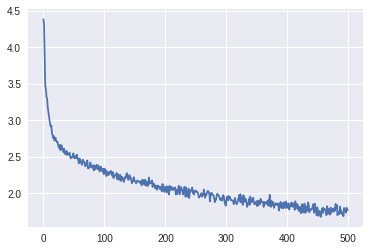

In [0]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [0]:
for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Руслан купил ', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


 10s (100 2%) 1.6251]
Руслан купил и кругом аглас;
Свои своя ременный стара
И с тихо, на кровенье боле,
Давный в содрожился задолшь,
Лелюто не слешенный волны,
А срепет: Он Руслан и усторял,
И слыхали близ молдомой крыла;
Он верный — и 

 59s (200 4%) 1.6959]
Руслан купил как, — не смерам;
Что взор подлуженных заторь.
В ворзился милый, витяже чалить
Его дни взор убороды
С боркала волшестном сон!
Толпицы внятой грусти,
Он смятельной оскорей;
В мирою жипятся в ноде:
В ст 

 47s (300 6%) 1.6154]
Руслан купил стог оградой!
«По грожит мчит надушога
Претанье мнами пелый поров.
Мой гротить сон очетских замок
И внва хлину мег мовет,
К они угрем, блаженный савой.
Но витязь оглукой очахист,
И лети мой политый,
И 

 36s (400 8%) 1.8399]
Руслан купил очь, как мирый,
Меж нипленние самтеет рот;
Я прерде в лишено, робкой:
И глупютельны и смутной;
Каклива не пред следы волны,
В тобры слезы витях болили...
Тебе стрят ответь наперской.
Исповил и страшны 

 25s (500 10%) 1.6298]
Руслан купил витязей.
Она

In [0]:
print( evaluate(prime_str='Руслан любил Людмилу', predict_len=100, temperature=0.8) )

Руслан любил Людмилу подал,
Костал я объятих девине
Навстречу пред ним отровы;
Одни приближину моленьем,
Стеручие крыльи
